In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Import relevant machine learning models

from sklearn import decomposition, preprocessing, svm
# Dimensionality Reduction
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

# Ensemble
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier

# Guassian
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Regression
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

# Bayesian
from sklearn.naive_bayes import GaussianNB

# Instance Based
from sklearn.neighbors import KNeighborsClassifier

# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import relevant machine learning analyis tools
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,roc_curve,accuracy_score,auc,roc_auc_score,confusion_matrix,precision_score,recall_score,f1_score, classification_report
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.model_selection import BaseCrossValidator, GridSearchCV, train_test_split,cross_val_score,cross_validate,cross_val_predict, KFold, StratifiedKFold, learning_curve
from sklearn.pipeline import Pipeline

# Standardization
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("./Heart_Disease_Data.csv",na_values="?")
data.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
219,59,1,4,138,271,0,2,182,0,0.0,1,0.0,3.0,0
280,57,1,4,110,335,0,0,143,1,3.0,2,1.0,7.0,2
31,60,1,4,117,230,1,0,160,1,1.4,1,2.0,7.0,2
142,52,1,2,128,205,1,0,184,0,0.0,1,0.0,3.0,0


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


pred_attribute is the one that says if the individual has a heart disease,<br>
for value >=1 we say that he has one<br>
So let's change all the values >=1 to 1.<br>
<br>
In this notebook we're trying to see if we can predict the pred_attribute.

In [5]:
data["pred_attribute"].replace(inplace=True, value=[1, 1, 1, 1], to_replace=[1, 2, 3, 4])

In [6]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
221,54,0,3,108,267,0,2,167,0,0.0,1,0.0,3.0,0
49,53,1,3,130,197,1,2,152,0,1.2,3,0.0,3.0,0
123,55,1,4,140,217,0,0,111,1,5.6,3,0.0,7.0,1
231,55,0,4,180,327,0,1,117,1,3.4,2,0.0,3.0,1
194,68,0,3,120,211,0,2,115,0,1.5,2,0.0,3.0,0


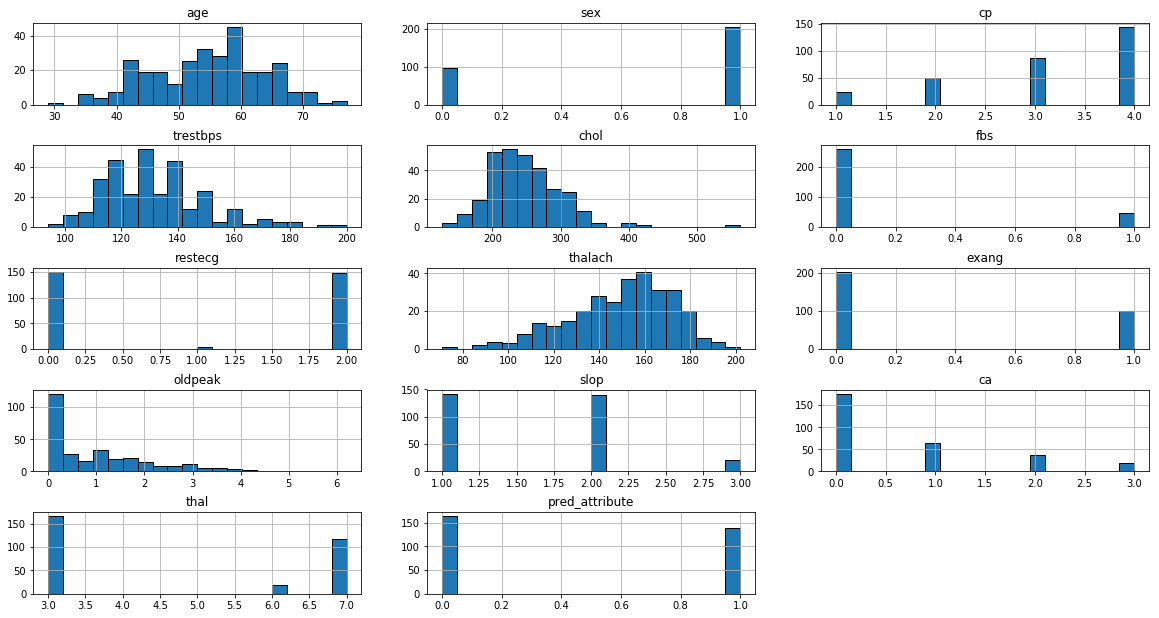

In [7]:
columns=data.columns[:14]
plt.subplots(figsize=(20,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()
 

**Impute missing values**

In [8]:
# Check nan values
data[data.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [9]:
# Replace missing data by the median
data = data.fillna(data.median())

# Separate into features and results
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [10]:
y.head(5)

0    0
1    1
2    1
3    0
4    0
Name: pred_attribute, dtype: int64

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
# Data Standardization only on the training set
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_test,columns=data.columns[:-1]).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
0,-1.266193,0.715891,0.861173,-1.212316,-0.706137,-0.411196,-0.953596,0.495005,-0.715891,-0.923939,-0.996355,-0.699643,1.164514
1,1.502318,0.715891,-0.207565,-0.764749,0.521246,-0.411196,-0.953596,0.045844,-0.715891,-0.058640,-0.996355,0.385701,1.164514
2,0.505654,0.715891,0.861173,0.354170,0.409665,-0.411196,1.061864,1.438244,-0.715891,-0.923939,-0.996355,-0.699643,-0.892511
3,1.059356,0.715891,0.861173,0.745792,-0.687540,-0.411196,1.061864,-0.807562,-0.715891,0.806659,0.678075,1.471044,0.650258
4,0.616394,-1.396861,0.861173,1.473089,1.041953,-0.411196,1.061864,0.495005,-0.715891,-0.923939,-0.996355,-0.699643,-0.892511


### A Look at the training test split

In [13]:
overview = pd.DataFrame({"Training dataset": y_train.sum(),
                      "Test dataset":y_test.sum()
                      },
                     index=["Healthy", "Sick"])
overview[["Training dataset", "Test dataset"]]
overview.iloc[0,0] = y_train.shape[0] -y_train.sum()
overview.iloc[0,1] = y_test.shape[0] -y_test.sum()
overview['total'] = overview['Training dataset'] + overview['Test dataset']
overview.loc['total'] =overview.loc['Healthy'] + overview.loc['Sick']
overview

,Training dataset,Test dataset,total
Healthy,130,34,164
Sick,112,27,139
total,242,61,303


# Apply machine learning algorithms
## Without feature engineering
#### Logistic Regression

In [14]:
model = LogisticRegression(random_state = 1)
model.fit(X_train, y_train)

# check the accuracy on the training set
print("Accuracy on training set: ", model.score(X_train, y_train))
# check the accuracy on the test set
print("Accuracy on test set: ", model.score(X_test, y_test))

Accuracy on training set:  0.871900826446281
Accuracy on test set:  0.8360655737704918


**Logistic Regression gives us a 83.6% accuracy**

## Testing everything at a time

In [15]:
random_state = 43

names = ["k-Nearest Neighbors",         
         "Support Vector Machine",
         "Linear SVM",
         "RBF SVM",
         "Gaussian Process",
         "Decision Tree",
         "Extra Trees",
         "Random Forest",
         "Extra Forest",
         "AdaBoost",
         "Gaussian Naive Bayes",
         "LDA",
         "QDA",
         "Logistic Regression",
         "SGD Classifier",
         "Multilayer Perceptron",
         "Voting Classifier"
        ]

algorithms = [ KNeighborsClassifier(n_neighbors=3),
               SVC(random_state=random_state),
               SVC(kernel="linear",random_state=random_state),
               SVC(kernel="rbf",random_state=random_state),
               GaussianProcessClassifier(),
               DecisionTreeClassifier(random_state=random_state),
               ExtraTreesClassifier(random_state=random_state),
               RandomForestClassifier(random_state=random_state),
               GradientBoostingClassifier(random_state=random_state),
               AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),n_estimators=10,learning_rate=0.1,random_state=random_state),
               GaussianNB(),
               LinearDiscriminantAnalysis(),
               QuadraticDiscriminantAnalysis(),
               LogisticRegression(random_state=random_state),
               SGDClassifier(max_iter=1000),               
               MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',random_state=random_state),
               VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)), ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))], voting='hard')
              ]



In [16]:
data_copy=[]
for model in algorithms:
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    data_copy.append(metrics.accuracy_score(pred_test, y_test))
    
models_df = pd.DataFrame(data_copy, index=names)   
models_df.columns=['Accuracy']
models_df

,Accuracy
k-Nearest Neighbors,0.819672
Support Vector Machine,0.836066
Linear SVM,0.819672
RBF SVM,0.836066
Gaussian Process,0.803279
Decision Tree,0.721311
Extra Trees,0.852459
Random Forest,0.819672
Extra Forest,0.754098
AdaBoost,0.721311


## Feature engineering
### Correlation

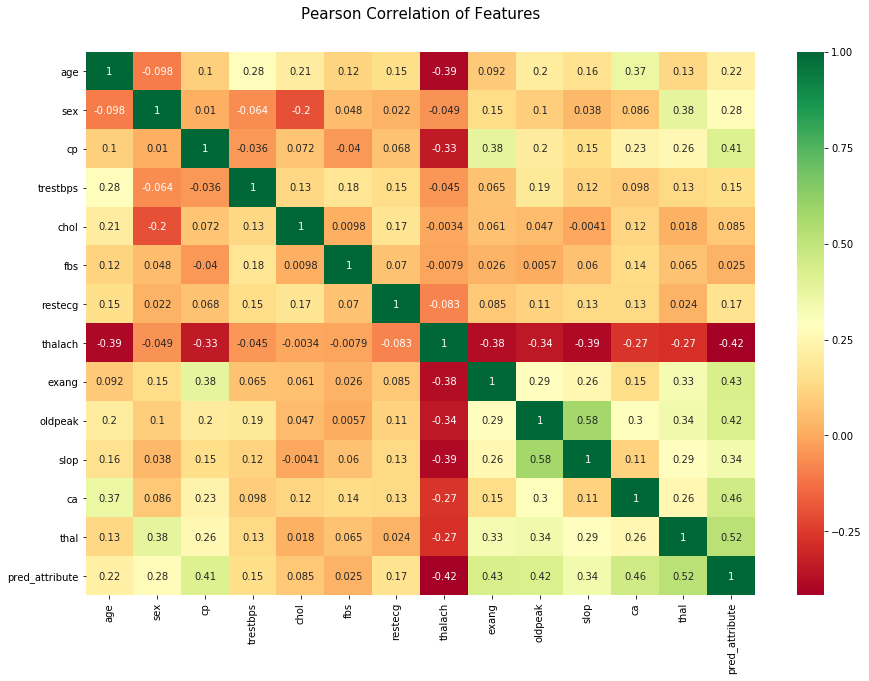

In [17]:
sns.heatmap(data[data.columns[:14]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf().set_size_inches(15, 10)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()

No correlated features in this plot 

### Feature importance:
#### Extra Trees Classifier :

In [18]:
model = ExtraTreesClassifier(n_estimators=100,random_state=random_state)
model.fit(X, y)
pd.DataFrame(pd.Series(model.feature_importances_, index=data.columns[:-1]).sort_values(ascending=False),columns=['importance'])


,importance
thal,0.155871
ca,0.126300
cp,0.101675
exang,0.089151
thalach,0.087040
oldpeak,0.081633
age,0.072506
chol,0.062324
trestbps,0.062110
slop,0.059413


#### Random Forest Classifier :

In [19]:
model = RandomForestClassifier(n_estimators=100,random_state=random_state)
model.fit(X, y)
pd.DataFrame(pd.Series(model.feature_importances_, index=data.columns[:-1]).sort_values(ascending=False),columns=['importance'])


,importance
thal,0.130490
cp,0.127358
thalach,0.117493
ca,0.107685
oldpeak,0.106955
age,0.081403
chol,0.081150
trestbps,0.077380
exang,0.056156
slop,0.054070


### Selecting the most important features :

In [20]:
# Dataset of selected features
dataset_select = data[['ca','thal','thalach','cp','oldpeak','exang','pred_attribute']]

X = dataset_select.iloc[:, :-1]
y = dataset_select.iloc[:, -1]


In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
# Data Standardization only on the training set
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
data_copy=[]
for model in algorithms:
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    data_copy.append(metrics.accuracy_score(pred_test, y_test))
    
models_df2 = pd.DataFrame(data_copy, index=names)  
models_df2.columns = ['New Accuracy']  

models_df2 = models_df2.merge(models_df, left_index=True, right_index=True, how='left')
models_df2['Increase'] = models_df2['New Accuracy'] - models_df2['Accuracy']
models_df2

,New Accuracy,Accuracy,Increase
k-Nearest Neighbors,0.786885,0.819672,-0.032787
Support Vector Machine,0.803279,0.836066,-0.032787
Linear SVM,0.852459,0.819672,0.032787
RBF SVM,0.803279,0.836066,-0.032787
Gaussian Process,0.803279,0.803279,0.000000
Decision Tree,0.721311,0.721311,0.000000
Extra Trees,0.754098,0.852459,-0.098361
Random Forest,0.786885,0.819672,-0.032787
Extra Forest,0.737705,0.754098,-0.016393
AdaBoost,0.704918,0.721311,-0.016393


In [24]:
models_df2.mean()

New Accuracy    0.803279
Accuracy        0.813886
Increase       -0.010608
dtype: float64

**Here we can see that dropping the columns yields a worst result so we'll stick with the number of columns we had at the beginning**

Now let's take a look at the ML algorithms that worked best

In [25]:
models_df.sort_values(by='Accuracy', ascending=False).head()

,Accuracy
Voting Classifier,0.868852
QDA,0.868852
Extra Trees,0.852459
Gaussian Naive Bayes,0.836066
RBF SVM,0.836066


In [26]:
models_df2.sort_values(by='New Accuracy', ascending=False).head()

,New Accuracy,Accuracy,Increase
LDA,0.852459,0.836066,0.016393
Linear SVM,0.852459,0.819672,0.032787
Multilayer Perceptron,0.852459,0.819672,0.032787
SGD Classifier,0.852459,0.786885,0.065574
Gaussian Naive Bayes,0.852459,0.836066,0.016393


We can see that QDA, Extra Trees are the best for data with all features<br>
LDA, Linear SVM, Multilayer Perceptron are the best with selected features

In [27]:
best_algos_all_features = [ExtraTreesClassifier(random_state=random_state),
               QuadraticDiscriminantAnalysis()
#                VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)), ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))], voting='hard')
              ]

best_algos_selected_features = [SVC(kernel="linear",random_state=random_state),
#                LinearDiscriminantAnalysis(),
#                MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',random_state=random_state)
              ]
best_algos_names = ['Extra Trees','QDA','Linear SVM']#,'LDA','Multilayer Perceptron']


In [28]:
# Original data
X_all_features = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split
X_train_all_features, X_test_all_features, y_train, y_test = train_test_split(X_all_features, y, test_size=0.2, random_state=1)

# Scale
scaler = StandardScaler()
scaler.fit(X_train_all_features)

X_train_all_features = scaler.transform(X_train_all_features)
X_test_all_features = scaler.transform(X_test_all_features)


# Original data
X_selected_features = dataset_select.iloc[:, :-1]

# Split
X_train_selected_features , X_test_selected_features , y_train, y_test = train_test_split(X_selected_features , y, test_size=0.2, random_state=1)

# Scale
scaler = StandardScaler()
scaler.fit(X_train_selected_features )

X_train_selected_features  = scaler.transform(X_train_selected_features )
X_test_selected_features  = scaler.transform(X_test_selected_features )



In [29]:
predicitions = []
for model in best_algos_all_features:
    model.fit(X_train_all_features,y_train)
    predicitions.append( model.predict(X_test_all_features))

    
for model in best_algos_selected_features:
    model.fit(X_train_selected_features,y_train)
    predicitions.append( model.predict(X_test_selected_features))

predictions_df = pd.DataFrame(predicitions, index=best_algos_names)   
predictions_df.loc['sum'] = predictions_df.sum(axis=0) 
predictions_df


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Extra Trees,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
QDA,0,0,0,1,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,1,1
Linear SVM,0,1,0,1,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,1
sum,0,1,0,3,0,0,0,3,2,3,...,1,3,0,0,0,0,0,0,1,3


In [30]:
voted_predictions =[]
for i in range(predictions_df.shape[1]):
    if predictions_df.iloc[predictions_df.shape[0] - 1,i] >= predictions_df.shape[0]/2 :
        voted_predictions.append(1.)
    else : 
        voted_predictions.append(0.)
        
voted_predictions = np.array(voted_predictions)
voted_predictions

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [31]:
metrics.accuracy_score(voted_predictions, y_test)

0.8852459016393442

### Using this voting system our accuracy is now at 88.5 %

Confusion matrix, without normalization
[[33  1]
 [ 6 21]]
Normalized confusion matrix
[[0.97 0.03]
 [0.22 0.78]]


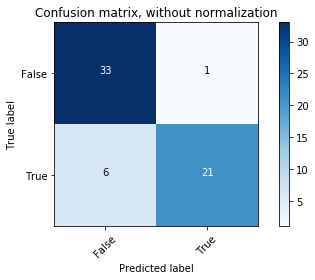

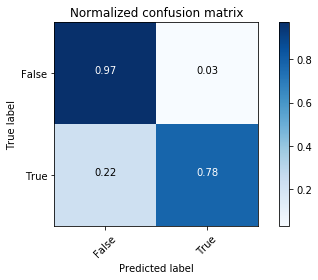

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


class_names= ['False','True']
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_pred=voted_predictions, y_true=y_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

